# Joanna Brown

## Research question/interests :

This semester we are analyzing a dataset provided by Inside Airbnb. 

As many of you know when you are browsing Airbnb listings, some of the hosts are designated as "superhosts". Airbnb first launched the superhost program in 2008 to recognize their "top rated and most experienced" hosts. I am curious to know what sets superhosts apart from regular hosts. 

Airbnb lists the factors that contribute to a host becoming a superhost :
1. Host a minimum of 10 stays in a year
2. Respond to guests quickly and maintain a 90% response rate or higher
3. Have at least 80% 5-star reviews
4. Honor confirmed reservations (meaning hosts should rarely cancel)

In this analysis I will look at the following specific questions:
- Q1 : how do superhosts and regular hosts compare in absulote number?
- Q2 : how do reviews compare between super hosts and regular hosts?
- Q3 : how do superhosts and hosts compare in terms of their response rate and response time?
- Q4 : does being a superhost pay off in terms of how much they can charge on average for their listings?



### Task 1. EDA :

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv ("../data/raw/listings.csv")

In [3]:
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20210806113117,2021-08-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.09
1,8077,https://www.airbnb.com/rooms/8077,20210806113117,2021-08-07,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,...,4.90,4.92,4.83,NaN,t,2,1,1,0,1.56
2,23691,https://www.airbnb.com/rooms/23691,20210806113117,2021-08-07,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,...,4.93,4.34,4.73,NaN,t,2,0,2,0,1.79
3,27423,https://www.airbnb.com/rooms/27423,20210806113117,2021-08-07,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",NaN,https://a0.muscache.com/pictures/176936/b687ed...,118124,https://www.airbnb.com/users/show/118124,...,5.00,4.82,4.82,NaN,f,1,1,0,0,0.21
4,28160,https://www.airbnb.com/rooms/28160,20210806113117,2021-08-06,"Safe, Central, Quiet and Great Amenities!",NaN,Simply the best and safest neighbourhood in T....,https://a0.muscache.com/pictures/166666/71e95e...,86838,https://www.airbnb.com/users/show/86838,...,5.00,5.00,4.86,NaN,f,1,1,0,0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,51492931,https://www.airbnb.com/rooms/51492931,20210806113117,2021-08-06,Spacious Studio Apartment Downtown Toronto Sma...,Very spacious cozy studio apartment. Located r...,The Kensington neighbourhood is defined by its...,https://a0.muscache.com/pictures/e7a25a9c-f8df...,311805447,https://www.airbnb.com/users/show/311805447,...,NaN,NaN,NaN,NaN,f,6,6,0,0,NaN
15080,51493223,https://www.airbnb.com/rooms/51493223,20210806113117,2021-08-06,Elegant One Bedroom Condo in Core Downtown,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/e90918d6-9268...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN
15081,51493266,https://www.airbnb.com/rooms/51493266,20210806113117,2021-08-07,Bright large 2 bedrooms apt with separate entr...,Bright large 2 bedrooms apt with separate entr...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,259499767,https://www.airbnb.com/users/show/259499767,...,NaN,NaN,NaN,STR-2009-UDFHGC,f,5,3,2,0,NaN
15082,51493385,https://www.airbnb.com/rooms/51493385,20210806113117,2021-08-06,2 BR Condo Downtown with CN Tower View,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/f921100f-37dd...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,STR-2011-GDQKVF,f,4,4,0,0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15084 entries, 0 to 15083
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15084 non-null  int64  
 1   listing_url                                   15084 non-null  object 
 2   scrape_id                                     15084 non-null  int64  
 3   last_scraped                                  15084 non-null  object 
 4   name                                          15083 non-null  object 
 5   description                                   14598 non-null  object 
 6   neighborhood_overview                         9326 non-null   object 
 7   picture_url                                   15084 non-null  object 
 8   host_id                                       15084 non-null  int64  
 9   host_url                                      15084 non-null 

In [5]:
display(df.shape[0])

15084

In [6]:
display(df.shape[1])

74

In [7]:
df.describe(include='float64')

,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,15077.000000,15077.000000,0.0,15084.000000,15084.000000,0.0,13945.000000,14873.000000,15084.000000,1.508400e+04,0.0,11609.000000,11435.000000,11437.000000,11434.000000,11434.000000,11433.000000,11434.000000,11609.000000
mean,5.689593,5.689593,NaN,43.681463,-79.397382,NaN,1.444532,1.645263,27.492761,4.942609e+05,NaN,4.650082,4.780028,4.679526,4.835753,4.837102,4.825204,4.694973,1.340099
std,18.884768,18.884768,NaN,0.048682,0.065256,NaN,0.824944,1.107654,39.570448,3.135789e+07,NaN,0.725082,0.430746,0.510812,0.383327,0.406078,0.336104,0.460011,3.584430
min,0.000000,0.000000,NaN,43.586740,-79.622620,NaN,1.000000,0.000000,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1.000000,1.000000,NaN,43.645490,-79.425860,NaN,1.000000,1.000000,28.000000,3.650000e+02,NaN,4.630000,4.750000,4.590000,4.830000,4.840000,4.780000,4.630000,0.160000
50%,1.000000,1.000000,NaN,43.663165,-79.397250,NaN,1.000000,1.000000,28.000000,1.125000e+03,NaN,4.840000,4.910000,4.840000,4.960000,4.970000,4.930000,4.810000,0.510000
75%,4.000000,4.000000,NaN,43.702235,-79.376487,NaN,2.000000,2.000000,28.000000,1.125000e+03,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.430000
max,272.000000,272.000000,NaN,43.833170,-79.119670,NaN,9.000000,13.000000,1125.000000,2.147484e+09,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,144.000000


In [8]:
df.describe(include='object').T

,count,unique,top,freq
listing_url,15084,15084,https://www.airbnb.com/rooms/1419,1
last_scraped,15084,2,2021-08-06,9702
name,15083,14742,Private room in a shared hostel suite downtown,8
description,14598,14018,Whether you are just getting away for the week...,12
neighborhood_overview,9326,7850,The lively Entertainment District lives up to ...,60
picture_url,15084,14646,https://a0.muscache.com/pictures/5b42a820-a046...,12
host_url,15084,9864,https://www.airbnb.com/users/show/10202618,71
host_name,15077,4740,David,105
host_since,15077,3272,2013-11-23,73
host_location,15070,336,"Toronto, Ontario, Canada",11048


### Task 2. Set up Analysis Pipeline :

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
%matplotlib inline

In [10]:
import project_functions2 as p2
data = "../data/raw/listings.csv"
df = p2.unprocessed(data)
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20210806113117,2021-08-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.09
1,8077,https://www.airbnb.com/rooms/8077,20210806113117,2021-08-07,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,...,4.90,4.92,4.83,NaN,t,2,1,1,0,1.56
2,23691,https://www.airbnb.com/rooms/23691,20210806113117,2021-08-07,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,...,4.93,4.34,4.73,NaN,t,2,0,2,0,1.79
3,27423,https://www.airbnb.com/rooms/27423,20210806113117,2021-08-07,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",NaN,https://a0.muscache.com/pictures/176936/b687ed...,118124,https://www.airbnb.com/users/show/118124,...,5.00,4.82,4.82,NaN,f,1,1,0,0,0.21
4,28160,https://www.airbnb.com/rooms/28160,20210806113117,2021-08-06,"Safe, Central, Quiet and Great Amenities!",NaN,Simply the best and safest neighbourhood in T....,https://a0.muscache.com/pictures/166666/71e95e...,86838,https://www.airbnb.com/users/show/86838,...,5.00,5.00,4.86,NaN,f,1,1,0,0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,51492931,https://www.airbnb.com/rooms/51492931,20210806113117,2021-08-06,Spacious Studio Apartment Downtown Toronto Sma...,Very spacious cozy studio apartment. Located r...,The Kensington neighbourhood is defined by its...,https://a0.muscache.com/pictures/e7a25a9c-f8df...,311805447,https://www.airbnb.com/users/show/311805447,...,NaN,NaN,NaN,NaN,f,6,6,0,0,NaN
15080,51493223,https://www.airbnb.com/rooms/51493223,20210806113117,2021-08-06,Elegant One Bedroom Condo in Core Downtown,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/e90918d6-9268...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN
15081,51493266,https://www.airbnb.com/rooms/51493266,20210806113117,2021-08-07,Bright large 2 bedrooms apt with separate entr...,Bright large 2 bedrooms apt with separate entr...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,259499767,https://www.airbnb.com/users/show/259499767,...,NaN,NaN,NaN,STR-2009-UDFHGC,f,5,3,2,0,NaN
15082,51493385,https://www.airbnb.com/rooms/51493385,20210806113117,2021-08-06,2 BR Condo Downtown with CN Tower View,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/f921100f-37dd...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,STR-2011-GDQKVF,f,4,4,0,0,NaN


### Quick look at numerical data comparison between hosts and superhosts.

In [11]:
superhosts, regularhosts = p2.split_host()

In [12]:
# get numeric subset of superhost, regular host
superhosts_num = p2.numeric_set(superhosts)
regularhosts_num = p2.numeric_set(regularhosts)

In [13]:
numeric_mean_by_hosts = p2.get_num_mean_hosts(superhosts_num, regularhosts_num)

numeric_mean_by_hosts

,superhost,regular
count,3943.000000,11134.000000
host_listings_count,3.962972,6.301060
host_total_listings_count,3.962972,6.301060
accommodates,3.176262,3.021376
bedrooms,1.476413,1.433249
beds,1.720397,1.618247
minimum_nights,22.309916,29.240974
minimum_minimum_nights,21.952828,28.973684
maximum_minimum_nights,22.905402,29.568888
minimum_nights_avg_ntm,22.419807,29.290866


### Plotted in a comparison plot:

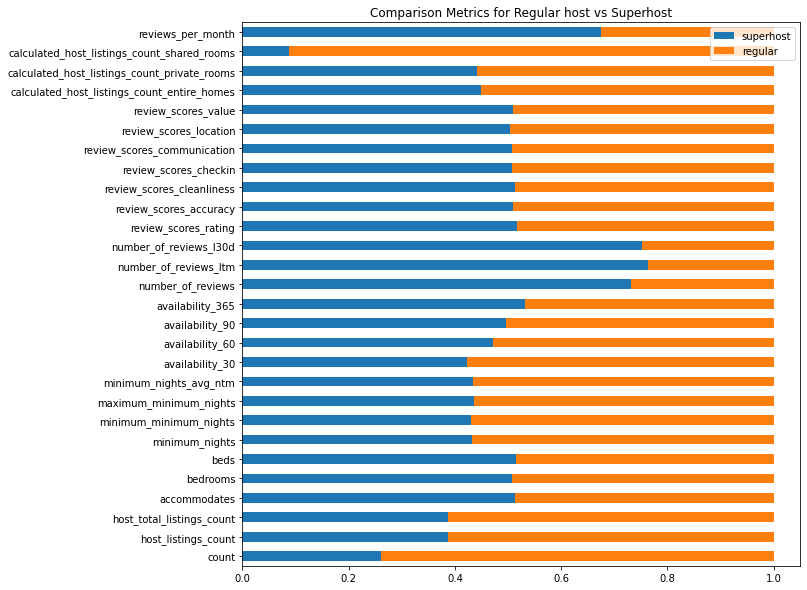

In [14]:
p2.plot_numeric_mean_by_host(numeric_mean_by_hosts)

#### First Impressions :
Hosts and Superhosts rate fairly evenly across the majority of review categories. Superhosts get proportionally more reviews than regular hosts, which is a reflection of the criteria of hosting a minimum 10 stays per year. Interestingly, superhosts have far less shared accomodation propotionally to regular hosts. 

### Cleaning data - 
- Price is an object and not a float - convert to use price as numeric data. 
- Remove % signs from host_response_rate and host_acceptance_rate

In [15]:
# Remove characters from price column and convert to float.
df['price'] = df['price'].apply(lambda x : p2.replace_characters(x, ['$', ','], '')).astype(float)

# Remove the '%' sign from the host_response_rate feature, and convert to float
df['host_response_rate'] = df['host_response_rate'].apply(lambda x : p2.replace_characters(x, '%', '')).astype(float)

# Remove the '%' sign from the host_acceptance_rate feature, and convert to float
df['host_acceptance_rate'] = df['host_acceptance_rate'].apply(lambda x : p2.replace_characters(x, '%', '')).astype(float)


In [16]:
# Quick look at statistic summary of the numeric variables

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'host_acceptance_rate', 'availability_365','host_response_rate']].describe().round(1)

,price,minimum_nights,number_of_reviews,reviews_per_month,host_acceptance_rate,availability_365,host_response_rate
count,15084.0,15084.0,15084.0,11609.0,8972.0,15084.0,8724.0
mean,156.4,27.4,25.8,1.3,80.5,128.3,87.5
std,365.6,39.6,52.5,3.6,28.1,134.5,28.0
min,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,65.0,28.0,1.0,0.2,75.0,0.0,93.0
50%,100.0,28.0,5.0,0.5,93.0,83.0,100.0
75%,168.0,28.0,26.0,1.4,100.0,243.0,100.0
max,13000.0,1125.0,828.0,144.0,100.0,365.0,100.0


#### Look at what columns have empty values / missing data?

In [17]:
all_data = ((df.isnull().sum() / df.shape[0])*100).sort_values(ascending = False)

missing_data = pd.DataFrame({'Missing Data (%)' : round(all_data, 2)}) 

display(missing_data)

,Missing Data (%)
neighbourhood_group_cleansed,100.00
calendar_updated,100.00
bathrooms,100.00
license,71.03
host_about,45.24
...,...
minimum_maximum_nights,0.00
maximum_maximum_nights,0.00
minimum_nights_avg_ntm,0.00
maximum_nights_avg_ntm,0.00


#### We can see that "neighbourhood_group_cleansed", "calendar_updated", "bathrooms", and "license" are missing the majority of their data, so they can be removed from the dataset. 

In [18]:
df1 = p2.drop_empty(df)

In [19]:
df1 = p2.rename_columns(df)

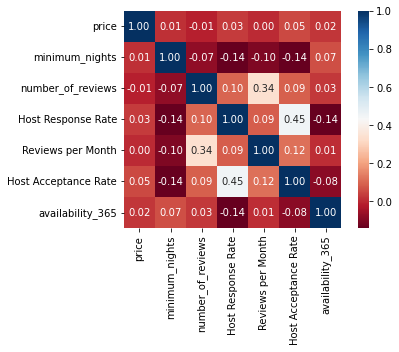

In [20]:
# Correlation matrix 
corr = df1[['price', 'minimum_nights', 'number_of_reviews', 'Host Response Rate', 'Reviews per Month',
'Host Acceptance Rate', 'availability_365']].corr()

# Plot the heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='White', annot=True);

# Task 4:
### Analysis of Reaserch Questions. 

### - Q1 : how do superhosts and regular hosts compare in absulote number?
Taking a first look at the Total Number of Hosts and Superhosts :

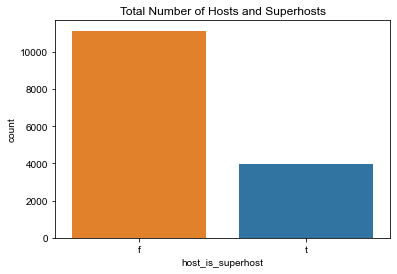

In [21]:
sns.countplot(x='host_is_superhost',palette=["C1", "C0"], data=df1).set(title="Total Number of Hosts and Superhosts")

sns.set(rc={'figure.figsize':(10,5)})

In [22]:
his_pie_values = df1.host_is_superhost.value_counts()

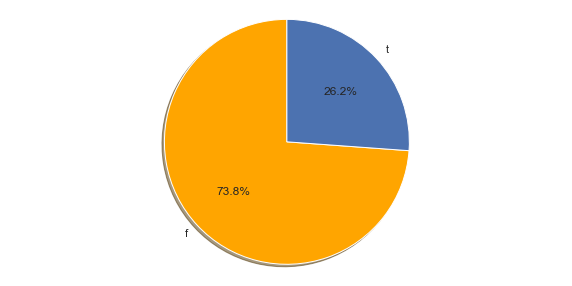

In [23]:
fig, ax = plt.subplots()
ax.pie(his_pie_values.values, labels=his_pie_values.index.values, colors = ['#FFA500', 'b'], autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal') 
plt.show()

#### Observations :
As we can see, regular hosts far outnumber superhosts in Toronto with there being almost 3x as many regular hosts as superhosts, or, 73.8% of hosts in Toronto are regular hosts. We can split the "Host is SuperHost" category to get a look at the exact numbers of regular hosts and superhosts and how they compare across categories in the listings. 

### - Q2 : how do reviews compare between super hosts and regular hosts?

Next we want to compare how the review scores of superhosts line up against regular hosts in the categories listed by Airbnb:
- review_scores_rating                          
- review_scores_accuracy                                             
- review_scores_checkin                        
- review_scores_communication                   
- review_scores_location                      
- review_scores_value 

We can begin by comparing the means for all the review scores across superhosts and regular hosts. 
As noted by Airbnb, superhosts must have at least 80% 5-star reviews.

<AxesSubplot:title={'center':'Value'}, xlabel='host_is_superhost', ylabel='Review Scores Value'>

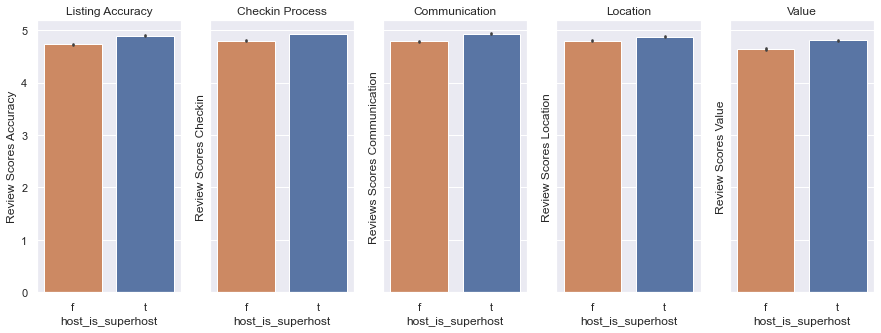

In [24]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

sns.barplot(ax=axes[0], x='host_is_superhost',y='Review Scores Accuracy', palette=["C1", "C0"], data=df1, estimator=np.mean).set(title="Listing Accuracy")
axes[0]

sns.barplot(ax=axes[1], x='host_is_superhost',y='Review Scores Checkin', palette=["C1", "C0"], data=df1, estimator=np.mean).set(title="Checkin Process")
axes[1]

sns.barplot(ax=axes[2], x='host_is_superhost',y='Reviews Scores Communication', palette=["C1", "C0"], data=df1, estimator=np.mean).set(title="Communication")
axes[2]

sns.barplot(ax=axes[3], x='host_is_superhost',y='Review Scores Location', palette=["C1", "C0"], data=df1, estimator=np.mean).set(title="Location")
axes[3]

sns.barplot(ax=axes[4], x='host_is_superhost',y='Review Scores Value', palette=["C1", "C0"], data=df1, estimator=np.mean).set(title="Value")
axes[4]


#### Observations :
Superhosts rate higher on all rating categories. Most noticeably, superhosts exceed in ratings of value, listing accuracy, and communication. The rating means for location are the closest amongst superhosts and regular hosts (*m=4.87 and m=4.80* respectively). 
    

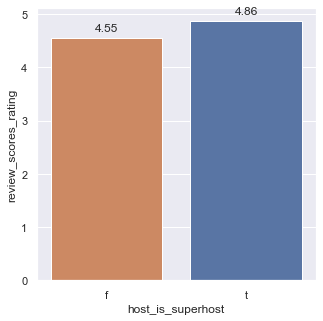

In [25]:
plt.figure(figsize=(5, 5))
splot = sns.barplot(data=df1, x = 'host_is_superhost', palette=["C1", "C0"], y = 'review_scores_rating', estimator=np.mean, ci = None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
               va = 'center', xytext = (0, 10), textcoords = 'offset points')

<AxesSubplot:xlabel='host_is_superhost', ylabel='review_scores_rating'>

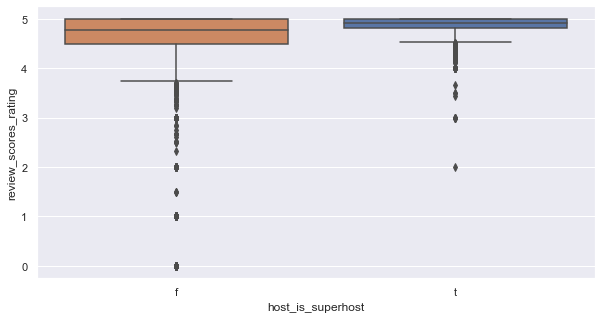

In [26]:
sns.boxplot(x="host_is_superhost", y="review_scores_rating", palette=["C1", "C0"], data=df1)

### Observations :
Superhosts have a mean overall rating score of 4.86 compared to 4.55 for regular hosts. The rating scores for regular hosts vary more widely over the range of possible scores, whereas superhosts are clustered much more towards the 5/5 ratings. We can see that 1 SD from the mean for superhosts is around 4.5/5 (no upper SD as highest possible score is 5/5) and the lower variability is consistent with the requirement for superhosts to have at least 80% 5 star reviews.

### Q3 : how do superhosts and hosts compare in terms of their response rate and response time?

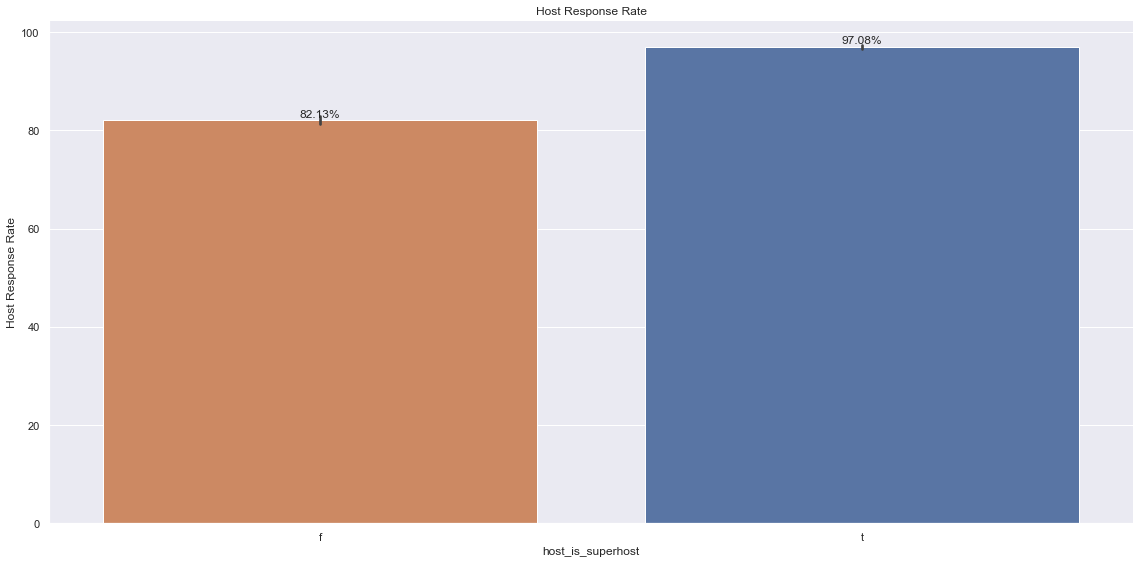

In [27]:
g = sns.catplot(x='host_is_superhost', y='Host Response Rate', palette=["C1", "C0"], data=df1, kind='bar', legend=True).set(title="Host Response Rate")
g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
total = len(df)
for p in ax.patches:
    percentage = f'{p.get_height():.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

### Observations :
Superhosts have a 97.08% response rate on average compared to 82.13% for regular hosts. Given that part of the Airbnb criteria is maintaining a 90% response rate is higher, the data is consisitent with the requirements. 

<AxesSubplot:xlabel='host_response_time', ylabel='proportion'>

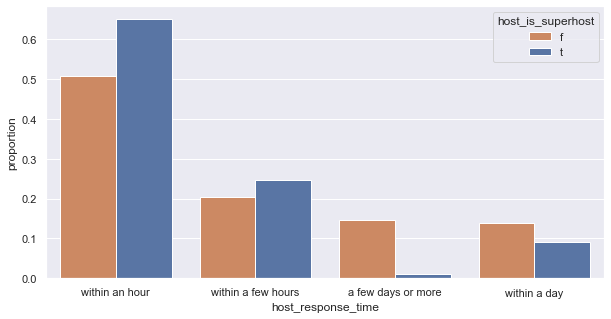

In [28]:
x, y, hue = "host_response_time", "proportion", "host_is_superhost"

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, palette=["C1", "C0"]))

### Observations :
The greatest proportion of superhosts respond within one hour, the next greatest propotion of superhosts within a few hours. About 50% of regular hosts respond within one hour, and the rest of the response times are spead over a few hours, a day, and a few days.  

### Q4 : does being a superhost pay off in terms of how much they can charge on average for their listings?

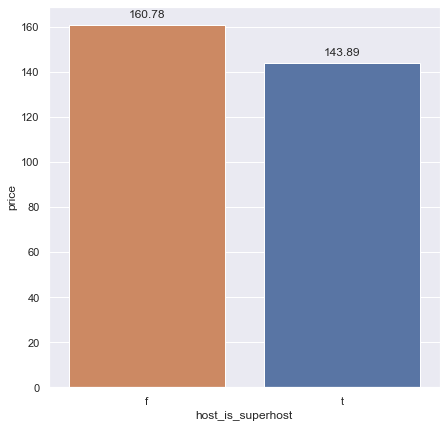

In [29]:
plt.figure(figsize=(7, 7))
splot = sns.barplot(data=df1, x = 'host_is_superhost', palette=["C1", "C0"], y = 'price', estimator=np.mean, ci = None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
               va = 'center', xytext = (0, 10), textcoords = 'offset points')



### Observations :
Superhosts, on average charge 144 dollars per night per listing, whereas regular hosts charge 160 dollars per night per listing. At first glance, it might seem like being a superhost does not pay off, however, further investigation could be performed in the area of the rental frequency of superhosts to calculate whether their overall profits are greater despite the lower nightly rental price. 

### Final impressions :

Taking a quick look back at the reserach questions:


- Q1 : how do superhosts and regular hosts compare in absulote number?
    - regular hosts outnumber superhosts, with hosts in Toronto being ~74% regular hosts and ~26% superhosts.
    
- Q2 : how do reviews compare between super hosts and regular hosts?
    - The mean reviews of superhosts rate higher in every category compared, with the overall review score for superhosts being and average of 4.86 compared to 4.55 for regular hosts.
    
- Q3 : how do superhosts and hosts compare in terms of their response rate and response time?
    - Superhosts have a ~97% response rate, with the greatest proportion of superhosts responding within and hour. 

- Q4 : does being a superhost pay off in terms of how much they can charge on average for their listings?
    - Regular hosts charge about 16 dollars more per night on average for their accomodations. 
    
#### Further research :
- profits of superhosts vs regular hosts
- occupancy rates for sueprhosts vs regular hosts
- whether # of years of expereince as a superhost or regular host allow them to charge more for thier listings. 

